In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('P:/python/crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA

In [121]:
data1 = data.copy()

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data1[data1.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [6]:
data1.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
column = ['Murder', 'Assault', 'UrbanPop', 'Rape']

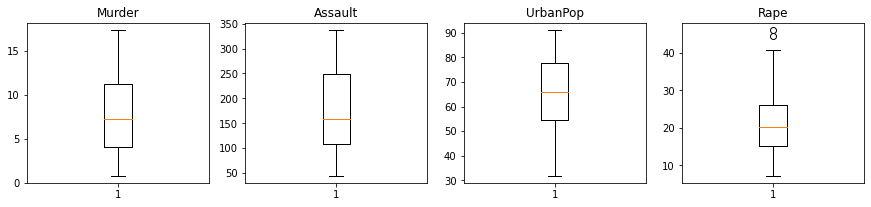

In [8]:
plot = 1
plt.figure(figsize = (15, 10))
for i in column:
    plt.subplot(3,4,plot)
    plt.boxplot(data1[i])
    plt.title(i)
    plot = plot+1

In [82]:
np.where(data1['Rape']>41)

(array([ 1, 27], dtype=int64),)

In [122]:
data1 = data1.drop(index = [1,27] ,axis = 0).reset_index()
data1 = data1.drop('index', axis = 1)
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Arizona,8.1,294,80,31.0
2,Arkansas,8.8,190,50,19.5
3,California,9.0,276,91,40.6
4,Colorado,7.9,204,78,38.7
5,Connecticut,3.3,110,77,11.1
6,Delaware,5.9,238,72,15.8
7,Florida,15.4,335,80,31.9
8,Georgia,17.4,211,60,25.8
9,Hawaii,5.3,46,83,20.2


C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

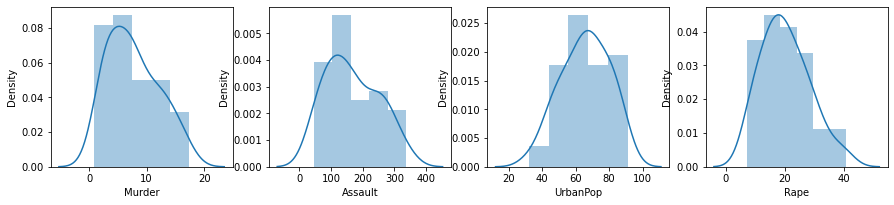

In [11]:
plot = 1
plt.figure(figsize = (15, 10))
for i in column:
    plt.subplot(3,4,plot)
    sns.distplot(data1[i])
    plot = plot+1

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

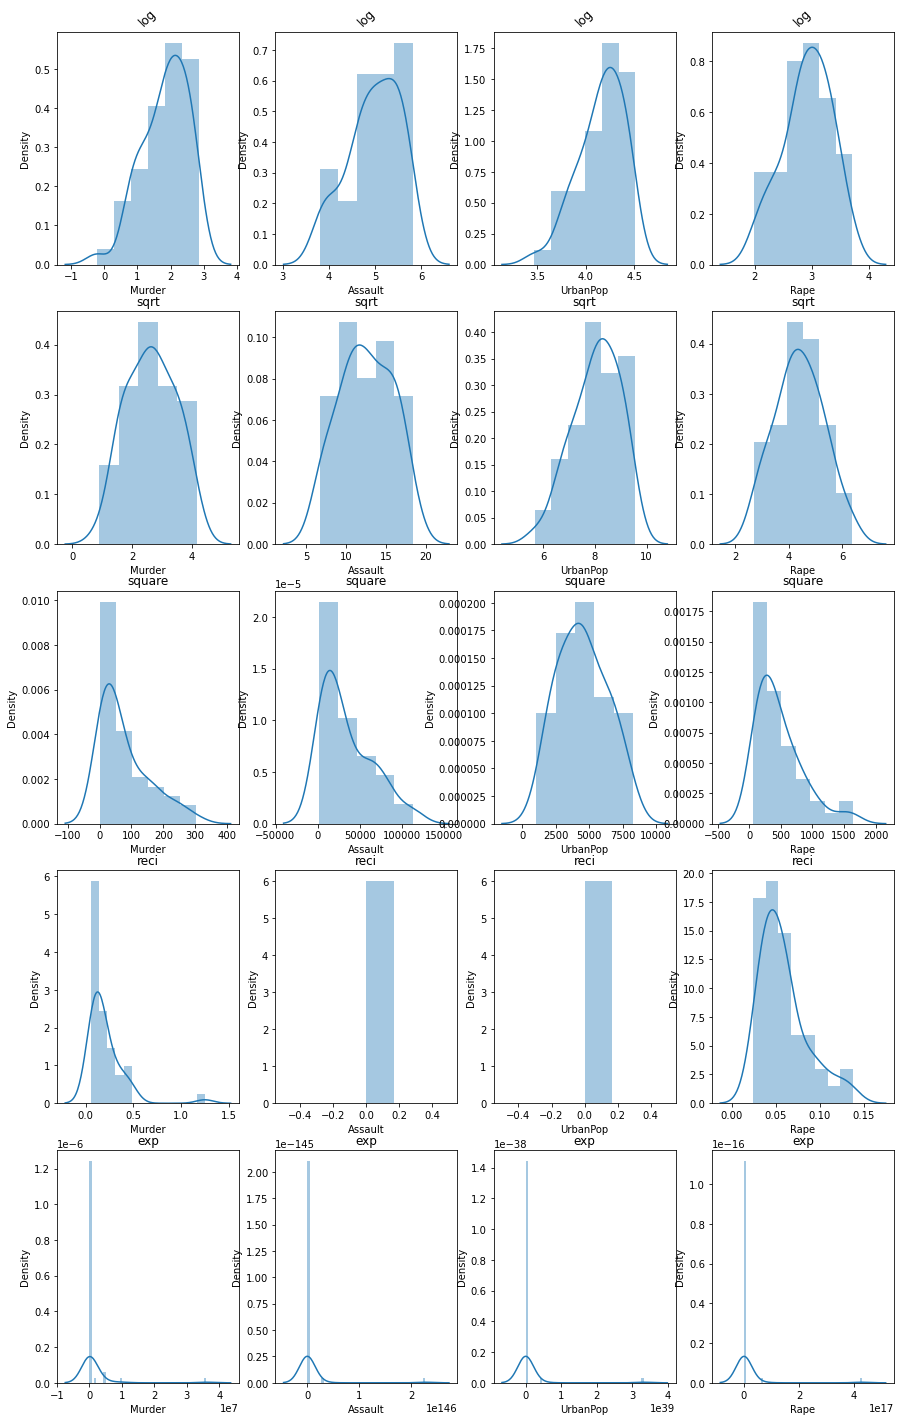

In [26]:
plot = 1
plt.figure(figsize = (15, 30))
for i in column:
    l = np.log(data1[i])
    plt.subplot(6,4,plot)
    sns.distplot(l)
    plt.title('log',rotation=45)
    plot = plot+1
for i in column:
    s = np.sqrt(data1[i])
    plt.subplot(6,4,plot)
    sns.distplot(s)
    plt.title('sqrt')
    plot = plot+1
for i in column:
    sq = np.square(data1[i])
    plt.subplot(6,4,plot)
    sns.distplot(sq)
    plt.title('square')
    plot = plot+1
for i in column:
    r = np.reciprocal(data1[i])
    plt.subplot(6,4,plot)
    sns.distplot(r)
    plt.title('reci')
    plot = plot+1
for i in column:
    e = np.exp(data1[i])
    plt.subplot(6,4,plot)
    sns.distplot(e)
    plt.title('exp')
    plot = plot+1

In [27]:
murder_sqrt = np.sqrt(data1.Murder)
assault_sqrt = np.sqrt(data1.Assault)
urbanpop_square = np.square(data1.UrbanPop)
rape_sqrt = np.sqrt(data1.Rape)

In [28]:
df = {'murder_sqrt': murder_sqrt, 'assault_sqrt': assault_sqrt, 'urbanpop_square': urbanpop_square, 'rape_sqrt': rape_sqrt}

In [30]:
data_tran = pd.concat(df, axis = 1)
data_tran

,murder_sqrt,assault_sqrt,urbanpop_square,rape_sqrt
0,3.633180,15.362291,3364,4.604346
1,2.846050,17.146428,6400,5.567764
2,2.966479,13.784049,2500,4.415880
3,3.000000,16.613248,8281,6.371813
4,2.810694,14.282857,6084,6.220932
5,1.816590,10.488088,5929,3.331666
6,2.428992,15.427249,5184,3.974921
7,3.924283,18.303005,6400,5.648008
8,4.171331,14.525839,3600,5.079370
9,2.302173,6.782330,6889,4.494441


#  Hierarchical

In [33]:
# normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [35]:
dt_norm = norm_func(data_tran)
dt_norm

,murder_sqrt,assault_sqrt,urbanpop_square,rape_sqrt
0,0.835775,0.742881,0.322447,0.518396
1,0.595569,0.896034,0.740802,0.780911
2,0.632320,0.607402,0.203390,0.467043
3,0.642550,0.850265,1.000000,1.000000
4,0.584780,0.650221,0.697258,0.958888
5,0.281413,0.324472,0.675899,0.171614
6,0.468297,0.748457,0.573240,0.346889
7,0.924610,0.995317,0.740802,0.802776
8,1.000000,0.671079,0.354968,0.647832
9,0.429596,0.006363,0.808185,0.488449


In [36]:
dt_norm.describe()

,murder_sqrt,assault_sqrt,urbanpop_square,rape_sqrt
count,48.000000,48.000000,48.000000,48.000000
mean,0.533894,0.497544,0.479491,0.464755
std,0.250454,0.284945,0.255385,0.247115
min,0.000000,0.000000,0.000000,0.000000
25%,0.333520,0.317265,0.283450,0.315589
50%,0.534362,0.501449,0.459143,0.474707
75%,0.746043,0.756022,0.681239,0.649838
max,1.000000,1.000000,1.000000,1.000000


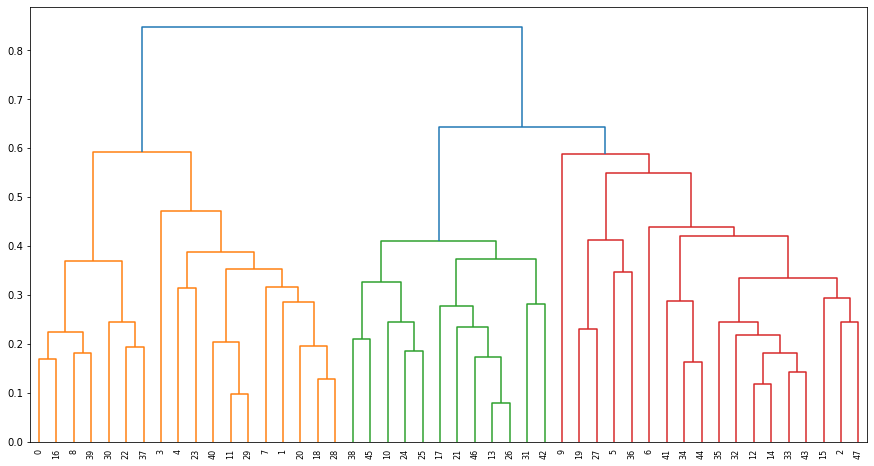

In [41]:
plt.figure(figsize=(15, 8)) 
dendrogram = sch.dendrogram(sch.linkage(dt_norm, method='average'))

In [49]:
model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
preds = model.fit_predict(dt_norm)
Clusters=pd.DataFrame(preds,columns=['Clusters'])
Clusters.value_counts()

Clusters
0           18
1           18
2           12
dtype: int64

In [91]:
data1['Clusters'] = Clusters
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Arizona,8.1,294,80,31.0,0
2,Arkansas,8.8,190,50,19.5,1
3,California,9.0,276,91,40.6,0
4,Colorado,7.9,204,78,38.7,0
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
7,Florida,15.4,335,80,31.9,0
8,Georgia,17.4,211,60,25.8,0
9,Hawaii,5.3,46,83,20.2,1


In [92]:
data1.groupby('Clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Clusters,,,,
0,12.283333,255.000000,68.833333,27.377778
1,6.055556,140.055556,71.333333,18.683333
2,3.091667,76.000000,52.083333,11.833333


# K-Means

In [100]:
# standardization
scaler = StandardScaler()
dt_std = scaler.fit_transform(data_tran)

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


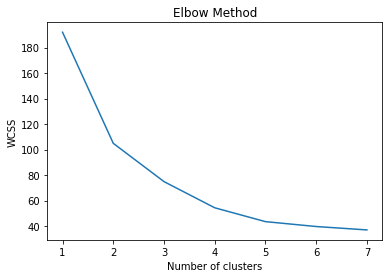

In [57]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(dt_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
model_km = KMeans(3, random_state=42)
preds_km = model_km.fit_predict(dt_std)
clusters_km = pd.DataFrame(preds_km, columns = ['clusters_km'])
clusters_km.value_counts()

clusters_km
1              20
2              18
0              10
dtype: int64

In [94]:
data1['clusters_km'] = clusters_km
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters,clusters_km
0,Alabama,13.2,236,58,21.2,0,2
1,Arizona,8.1,294,80,31.0,0,2
2,Arkansas,8.8,190,50,19.5,1,1
3,California,9.0,276,91,40.6,0,2
4,Colorado,7.9,204,78,38.7,0,2
5,Connecticut,3.3,110,77,11.1,1,1
6,Delaware,5.9,238,72,15.8,1,1
7,Florida,15.4,335,80,31.9,0,2
8,Georgia,17.4,211,60,25.8,0,2
9,Hawaii,5.3,46,83,20.2,1,1


In [95]:
data1.groupby('clusters_km').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Clusters
,mean,mean,mean,mean,mean
clusters_km,,,,,
0,2.680000,70.1,51.000000,10.910000,2.0
1,5.965000,136.6,69.950000,18.460000,1.1
2,12.283333,255.0,68.833333,27.377778,0.0


# DBSCAN

In [174]:
model_db = DBSCAN(eps=1.6, min_samples=7)
preds_dbscan = model_db.fit_predict(dt_std)
silhouette_score(dt_std, preds_dbscan)

0.42380148586969363

In [190]:
data1['clusters_dbscan'] = preds_dbscan
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_dbscan
0,Alabama,13.2,236,58,21.2,0
1,Arizona,8.1,294,80,31.0,0
2,Arkansas,8.8,190,50,19.5,1
3,California,9.0,276,91,40.6,0
4,Colorado,7.9,204,78,38.7,0
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
7,Florida,15.4,335,80,31.9,0
8,Georgia,17.4,211,60,25.8,0
9,Hawaii,5.3,46,83,20.2,1


In [192]:
data1.clusters_dbscan.value_counts()

1    30
0    18
Name: clusters_dbscan, dtype: int64

In [193]:
data1.groupby('clusters_dbscan').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_dbscan,,,,
0,12.283333,255.000000,68.833333,27.377778
1,4.870000,114.433333,63.633333,15.943333


First i have loaded a dataset and started with EDA phase. Then by moving to EDA the names of the columns and familiar with python, after that in this data there is no null values and no duplicates. I have check with an outliers and i got two outliers in 'rape' and i have removed that outliers. And no dimension is following normal distribution. And i have done transformations, by applying sqrt and square i observed that, the data is following normal distribution(approximately). And i have created a new dataframe and i have named them. For performing the clustering techniques the data should be in normalized or standardized the reason is, for dividing the data in clusters we have to find the distance and plot the dendrograms. Finding the distance and ploting the dendrograms the data points shoulds be near to each other. If the data points are not near finding the distance is difficultly. So, i have done the normalization which is in 0's and 1's and standardization which have mean=0 and standard deviation=1.

###### Hierarchical
In hierarchical i have started with ploting a dendrogram with linkage method is average. I have build a model with AgglomerativeClustering by giving n-clusters=3 , euclidean distance and linkage is average. And i have fitted the data on model. Then the data is divided in three clusters. Finally the mean value of the ever cluster is not near.

###### K-Means
In K-Means i have plotted a k-plot for finding a no. of clusters to create and i have observed three cluster is better. Then i have build a model with Kmeans by giving no. of clusters=3 and random state. And i have fitted the data on model. Then the data is divided into three clusters. Amd the mean of the clusters in not near.

###### DBSCAN
In DBSCAN i have build a model with dbscan by giving epslion=1.6 and min-samples=7. And i have fitted the data on model. Then the data is divided into two clusters. And the mean of the clusters is not near.